# SRD Tomographic Binning

In [1]:
#  Niko Sarcevic
#  nikolina.sarcevic@gmail.com
#  github.com/nikosarcevic

Use this notebook to perform the tomographic binning of the SRD lens and source galaxy samples. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import srd_redshift_distributions
import binning

## Generate the redshfit interval and the redshfit distribution(s)

Define the redshfit interval and forecast year:

In [3]:
redshift_range = np.linspace(0.01, 4., 400)  # this is the LSST default redshift range
forecast_year = "10"  # change year to "1" if you wish SRD year 1 binning

Initialise the SRD redshift distributions for lenses and sources

In [4]:
srd_lens = srd_redshift_distributions.SRD(galaxy_sample="lens_sample", 
                                          forecast_year=forecast_year)
srd_source = srd_redshift_distributions.SRD(galaxy_sample="source_sample", 
                                            forecast_year=forecast_year)

Generate the SRD lens and source sample redshift distributions

In [5]:
dndz_lens = srd_lens.get_redshift_distribution(redshift_range,
                                               normalised=True,
                                               save_file=False)

dndz_source = srd_source.get_redshift_distribution(redshift_range,
                                                   normalised=True,
                                                   save_file=False)

## Perform the binning procedure

The code will automatically slice the redshift distribution into appropriate bins, depending on the galaxy sample (lens or source) and forecast year (1 or 10).

The output (bins) will be normalised by default and output is a dictionary. The normalisation be skipped by setting normalised argument to false.
Functions source_bins() and lens_bins() from the Binning class will also autmatically save the results as a .csv file. The first column will be the redshfit interval. Bins will be in the other columns with the dictionary keys as column headers. If you do not wish to save the file as a .csv, simply set the save_file argument to false.

In [6]:
source_bins = binning.Binning(redshift_range, 
                              dndz_source,
                              forecast_year).source_bins(normalised=True,
                                                         save_file=True)

lens_bins = binning.Binning(redshift_range, 
                            dndz_lens,
                            forecast_year).lens_bins(normalised=True,
                                                     save_file=True)

## Plot

Plot the results to inspect visually.

### Lens sample bins

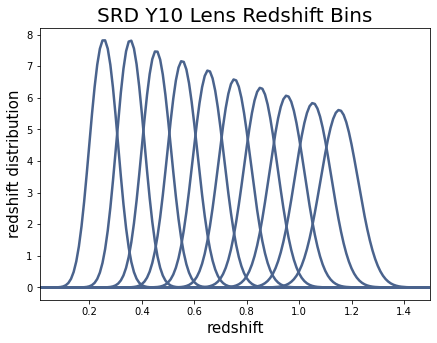

In [7]:
fig = plt.figure(figsize=(7,5))
plt.rcParams['lines.linewidth'] = 2.5
dutchblue = "#4A638d"
dutchorange = "#FF9B00"

for i in lens_bins.keys():
     plt.plot(redshift_range, 
              lens_bins[i], 
              color=dutchblue)
        
plt.xlabel("redshift", fontsize=15)
plt.ylabel("redshift distribution", fontsize=15)
plt.xlim(0.01, 1.5)
plt.title(f"SRD Y{forecast_year} Lens Redshift Bins", fontsize=20)
plt.savefig(f"SRD_lens_bins_year{forecast_year}.pdf")

### Source sample bins

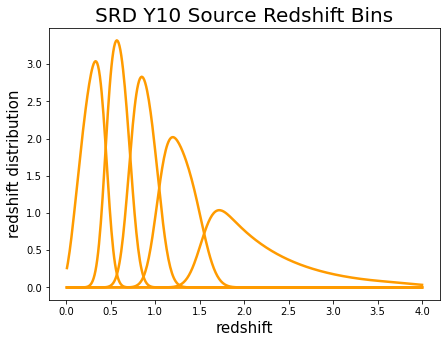

In [8]:
fig = plt.figure(figsize=(7,5))

for i in source_bins.keys():
     plt.plot(redshift_range, 
              source_bins[i], 
              color=dutchorange)
        
plt.xlabel("redshift", fontsize=15)
plt.ylabel("redshift distribution", fontsize=15)
plt.title(f"SRD Y{forecast_year} Source Redshift Bins", fontsize=20)
plt.savefig(f"SRD_source_bins_year{forecast_year}.pdf")